# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data['CUST_ID'].nunique()

8950

In [7]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(0)

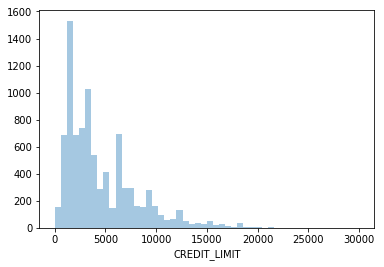

In [8]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

# Clustering

In [9]:
from sklearn.cluster import KMeans

In [31]:
# Get features we need
features = ['BALANCE', 'PAYMENTS', 'PURCHASES','CREDIT_LIMIT','TENURE']
X = data[features]

In [32]:
X.head()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT,TENURE
0,40.900749,201.802084,95.40,1000.0,12
1,3202.467416,4103.032597,0.00,7000.0,12
2,2495.148862,622.066742,773.17,7500.0,12
3,1666.670542,0.000000,1499.00,7500.0,12
4,817.714335,678.334763,16.00,1200.0,12


# Choosing Optimal k

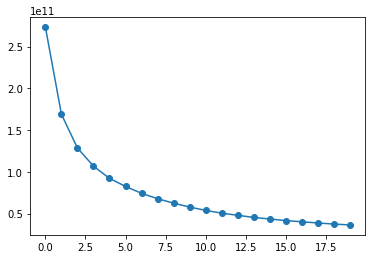

In [33]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [34]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=6, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [35]:
new_data.head()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT,TENURE,labels
0,40.900749,201.802084,95.40,1000.0,12,5
1,3202.467416,4103.032597,0.00,7000.0,12,1
2,2495.148862,622.066742,773.17,7500.0,12,1
3,1666.670542,0.000000,1499.00,7500.0,12,1
4,817.714335,678.334763,16.00,1200.0,12,5


# Plot Centers and labels

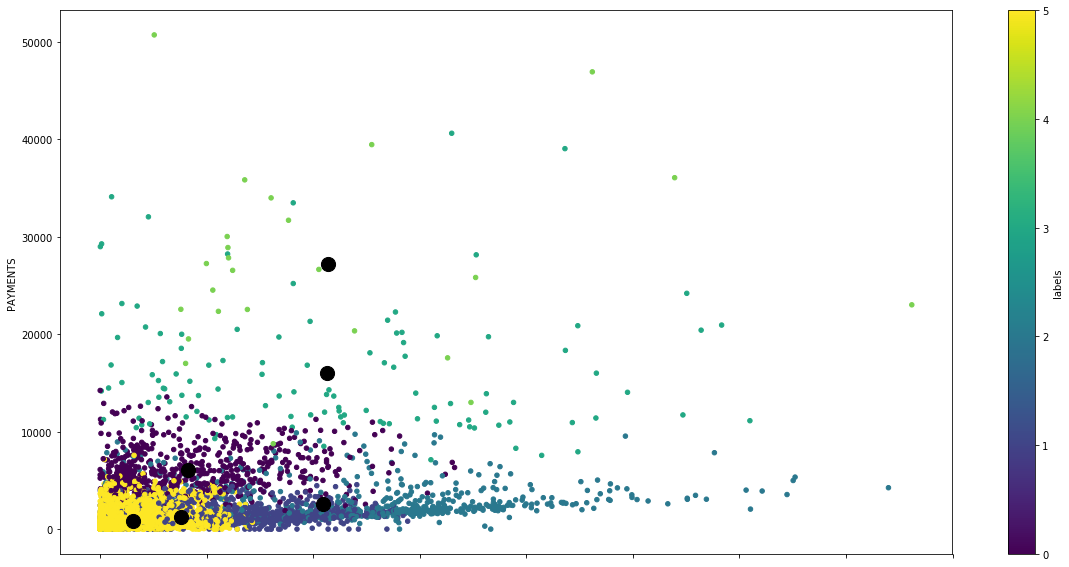

In [37]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='BALANCE', 
                      y='PAYMENTS', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

In [21]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.0
mean,532.329495,0.818327,429.276102,191.072701,238.527541,0.0
std,546.744091,0.276035,463.847722,331.196642,354.413972,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,48.512777,0.700000,45.650000,0.000000,0.000000,0.0
50%,284.909550,1.000000,275.135000,0.000000,77.700000,0.0
75%,1004.462638,1.000000,659.795000,249.292500,355.472500,0.0
max,1809.828751,1.000000,2123.430000,1729.670000,2123.430000,0.0


In [22]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,22.000000,22.000000,22.000000,22.000000,22.00000,22.0
mean,5601.644631,0.954132,28394.162273,22858.457273,5535.70500,1.0
std,4450.258357,0.158219,8029.034627,8356.036260,4903.70606,0.0
min,1268.809031,0.272727,17945.000000,9449.070000,0.00000,1.0
25%,2825.700860,1.000000,22171.827500,17134.670000,630.08250,1.0
50%,3422.898250,1.000000,26492.365000,21952.190000,4828.50000,1.0
75%,7707.034662,1.000000,32229.672500,26166.432500,8143.80750,1.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.19000,1.0


In [23]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.0
mean,3619.633459,0.986057,8719.902162,5824.456216,2895.445946,2.0
std,3102.515197,0.050393,2670.135263,2940.052368,3249.807214,0.0
min,204.329381,0.636364,4939.100000,0.000000,0.000000,2.0
25%,975.416023,1.000000,6636.910000,3756.010000,560.530000,2.0
50%,2813.134224,1.000000,8209.770000,5910.040000,1901.310000,2.0
75%,5266.121863,1.000000,10166.690000,7469.700000,4264.210000,2.0
max,15244.748650,1.000000,22500.000000,14215.000000,22500.000000,2.0


In [24]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.0
mean,7301.474658,0.993435,1020.727917,573.216667,447.627483,3.0
std,2100.615172,0.036470,1410.783171,937.812329,803.950249,0.0
min,4925.502001,0.545455,0.000000,0.000000,0.000000,3.0
25%,5814.605380,1.000000,0.000000,0.000000,0.000000,3.0
50%,6747.420295,1.000000,352.420000,68.160000,0.000000,3.0
75%,8073.266763,1.000000,1556.500000,844.995000,494.810000,3.0
max,18495.558550,1.000000,6855.590000,4685.540000,4872.600000,3.0


In [25]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.0
mean,1201.499747,0.952925,3075.086510,1939.416431,1136.317139,4.0
std,1132.938538,0.127338,1061.519347,1155.401903,1042.735479,0.0
min,0.000000,0.000000,1499.000000,0.000000,0.000000,4.0
25%,317.921880,1.000000,2242.065000,1184.470000,287.995000,4.0
50%,788.595800,1.000000,2788.810000,1845.420000,913.400000,4.0
75%,1819.810841,1.000000,3726.720000,2586.175000,1708.790000,4.0
max,5577.636715,1.000000,6897.560000,5788.810000,6897.560000,4.0


In [26]:
# Cluster 5
cluster_5 = new_data[new_data['labels']==5]
cluster_5.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,labels
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.0
mean,3047.998174,0.980993,425.011420,240.095240,185.018441,5.0
std,952.169447,0.065965,572.681718,403.437668,367.339733,0.0
min,1773.323689,0.454545,0.000000,0.000000,0.000000,5.0
25%,2257.008638,1.000000,0.000000,0.000000,0.000000,5.0
50%,2818.610736,1.000000,141.405000,0.000000,0.000000,5.0
75%,3765.092343,1.000000,716.142500,328.175000,200.000000,5.0
max,5317.783607,1.000000,2570.000000,2461.900000,2448.600000,5.0
